In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tw= pd.read_csv("/content/drive/MyDrive/CS 539 Final Project/Tweet data/tweets_cleaned.csv")
tw

,target,id,date,flag,user,text
0,0.0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"- Awww, that's a bummer. You shoulda got Da..."
1,0.0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0.0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball. Managed to s...
3,0.0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0.0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"no, it's not behaving at all. i'm mad. why am..."
...,...,...,...,...,...,...
1599995,1.0,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1.0,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1.0,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1.0,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
#Shuffle data randomly
tw = tw.sample(frac=1).reset_index(drop=True)
tw

,target,id,date,flag,user,text
0,0.0,2236308621,Fri Jun 19 03:22:32 PDT 2009,NO_QUERY,unreal1990,Hello is there anybody out there?
1,1.0,1986349384,Sun May 31 18:42:39 PDT 2009,NO_QUERY,andrea122887,"sooo tired...but, made money at my sister's gr..."
2,0.0,2255652394,Sat Jun 20 11:35:06 PDT 2009,NO_QUERY,rra_incognito,Damnit. The offspring and dropkick murphies ar...
3,1.0,2174427216,Sun Jun 14 22:31:47 PDT 2009,NO_QUERY,Augielopez,Lol well werent you one happy child
4,1.0,1978879978,Sun May 31 00:47:35 PDT 2009,NO_QUERY,taylorkv,Good luck-- I know how having those two tasks...
...,...,...,...,...,...,...
1599995,1.0,2039671299,Thu Jun 04 22:31:08 PDT 2009,NO_QUERY,leojeanette,- Besides the fact the doll looks like she ha...
1599996,1.0,1677112509,Sat May 02 00:30:44 PDT 2009,NO_QUERY,intepid,Deltoid - a nice science blog for people who d...
1599997,1.0,2064504372,Sun Jun 07 06:26:59 PDT 2009,NO_QUERY,jasminewie,home from dad's! miss him already.. School tmr...
1599998,0.0,1980711076,Sun May 31 07:28:43 PDT 2009,NO_QUERY,SaharOo21,oh man...I don't know!! Try webmd.com or I'd ...


In [ ]:
X = tw['text']
y = tw['target']
print(X)
print(y)

0                         Hello is there anybody out there? 
1          sooo tired...but, made money at my sister's gr...
2          Damnit. The offspring and dropkick murphies ar...
3                       Lol well werent you one happy child 
4           Good luck-- I know how having those two tasks...
                                 ...                        
1599995     - Besides the fact the doll looks like she ha...
1599996    Deltoid - a nice science blog for people who d...
1599997    home from dad's! miss him already.. School tmr...
1599998     oh man...I don't know!! Try webmd.com or I'd ...
1599999    fuck, I'm in so much pain  and its so pathetic...
Name: text, Length: 1600000, dtype: object
0          0.0
1          1.0
2          0.0
3          1.0
4          1.0
          ... 
1599995    1.0
1599996    1.0
1599997    1.0
1599998    0.0
1599999    0.0
Name: target, Length: 1600000, dtype: float64


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ... 1842   31   82]
 [   0    0    0 ...   15  139  197]
 [   0    0    0 ...   22   10 1636]
 ...
 [   0    0    0 ...  141  239  208]
 [   0    0    0 ... 2341   95   93]
 [   0    0    0 ...   15 3319  102]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets, y, test_size=0.2)


In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Dense, Bidirectional, LSTM, Concatenate, 
                                     Dropout, Embedding, GRU, SimpleRNN,
                                     Input, Attention, GlobalMaxPool1D, Flatten)
from tensorflow.keras.optimizers import Adam
import os

checkpoint_path = "/content/drive/MyDrive/CS 539 Final Project/Attention/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)



input_size = 200
inputs = Input(shape=(input_size))
x = Embedding(max_words, 256,
                    input_length=input_size)(inputs)
x = Dropout(0.3)(x)
decoder = Dense(256, activation="relu")(x)
decoder = Dropout(0.3)(decoder)
att = Attention(128)([x, decoder])
att = Flatten()(att)
att = Dense(64, activation="relu")(att)
att = Dropout(0.3)(att)
predictions = Dense(1, activation='sigmoid')(att)

model2 = Model(inputs=inputs, outputs=predictions)

model2.compile(loss='binary_crossentropy',
              optimizer='Adam', metrics=['accuracy'])

model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 200, 256)     1280000     ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 200, 256)     0           ['embedding_1[0][0]']            
                                                                                                  
 dense_4 (Dense)                (None, 200, 256)     65792       ['dropout[0][0]']                
                                                                                              

In [ ]:
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)

history2 = model2.fit(X_train, y_train, batch_size=16, validation_split=0.2, epochs=10, verbose=1)
# history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint])

Epoch 1/10
64000/64000 [==============================] - 466s 7ms/step - loss: 0.4763 - accuracy: 0.7805 - val_loss: 0.4479 - val_accuracy: 0.7918
Epoch 2/10
64000/64000 [==============================] - 430s 7ms/step - loss: 0.4677 - accuracy: 0.7861 - val_loss: 0.4472 - val_accuracy: 0.7921
Epoch 3/10
64000/64000 [==============================] - 441s 7ms/step - loss: 0.4669 - accuracy: 0.7865 - val_loss: 0.4424 - val_accuracy: 0.7955
Epoch 4/10
64000/64000 [==============================] - 440s 7ms/step - loss: 0.4676 - accuracy: 0.7862 - val_loss: 0.4537 - val_accuracy: 0.7941
Epoch 5/10
64000/64000 [==============================] - 447s 7ms/step - loss: 0.4647 - accuracy: 0.7876 - val_loss: 0.4451 - val_accuracy: 0.7948
Epoch 6/10
64000/64000 [==============================] - 425s 7ms/step - loss: 0.4642 - accuracy: 0.7884 - val_loss: 0.4402 - val_accuracy: 0.7950
Epoch 7/10
64000/64000 [==============================] - 441s 7ms/step - loss: 0.4654 - accuracy: 0.7885 - val_

In [ ]:
model2.save_weights("/content/drive/MyDrive/CS 539 Final Project/Attention/training_1")

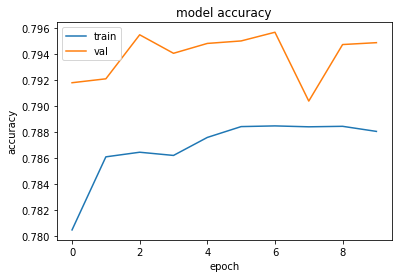

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

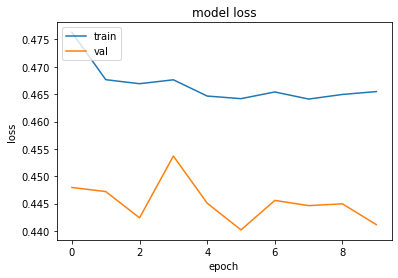

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 58s 6ms/step - loss: 0.4695 - accuracy: 0.7767


[0.4695484936237335, 0.7767093777656555]